行数: 289
                timestamp         price
0 2026-01-23 12:46:00.502  89126.551267
1 2026-01-23 12:52:30.464  89221.424229
2 2026-01-23 12:57:00.463  89183.303934
3 2026-01-23 13:00:34.411  89156.675252
4 2026-01-23 13:06:00.610  89177.081068


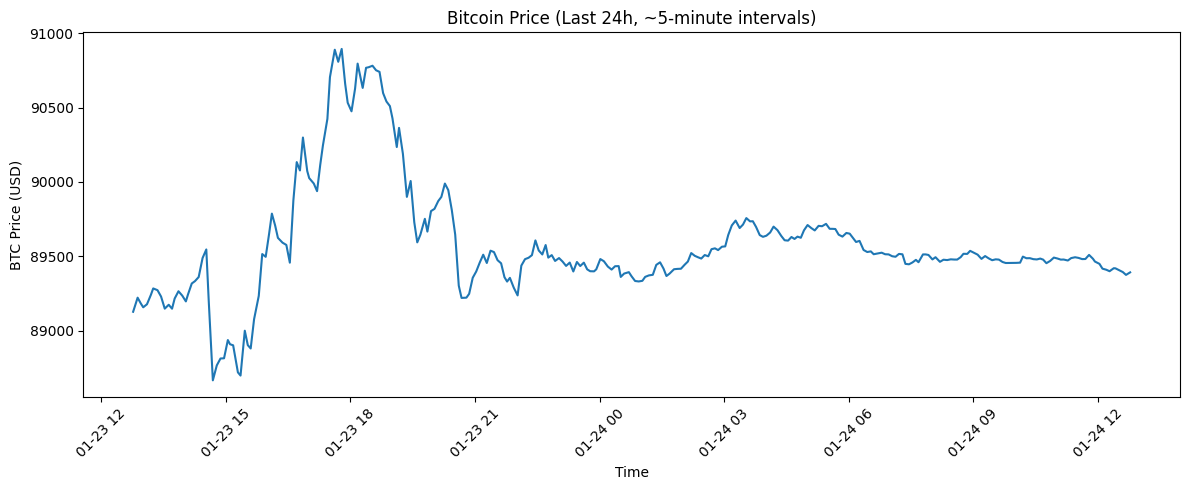

C:\Users\flare\AppData\Local\Temp\ipykernel_24864\2753693965.py:47: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().strftime("%Y%m%d-%H%M%S")


CSV 保存完了: bitcoin_24h_5min_20260124-124657.csv


In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# -----------------------------------------
# 1. CoinGecko API から直近 1 日（約 5 分足）を取得
# -----------------------------------------

url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {
    "vs_currency": "usd",
    "days": "1"        # ← ここで1日分を指定
}

resp = requests.get(url, params=params)
resp.raise_for_status()
data = resp.json()

# -----------------------------------------
# 2. DataFrame に変換
# -----------------------------------------

df = pd.DataFrame(data["prices"], columns=["timestamp", "price"])
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")

print("行数:", len(df))
print(df.head())

# -----------------------------------------
# 3. プロット
# -----------------------------------------

plt.figure(figsize=(12, 5))
plt.plot(df["timestamp"], df["price"])
plt.title("Bitcoin Price (Last 24h, ~5-minute intervals)")
plt.xlabel("Time")
plt.ylabel("BTC Price (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------------------
# 4. CSV へ保存（UTC 時刻付き）
# -----------------------------------------

now = datetime.utcnow().strftime("%Y%m%d-%H%M%S")
filename = f"bitcoin_24h_5min_{now}.csv"

df.to_csv(filename, index=False, encoding="utf-8")

print(f"CSV 保存完了: {filename}")
